# K Means Model

### Import Section

In [1]:
import warnings

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform, pdist

from pickle import dump

warnings.filterwarnings('ignore')

In [2]:
housing = pd.read_csv('../data/raw/housing.csv')

### Data Review

In [3]:
housing.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [4]:
for i in housing.columns:
    print(housing[i].isna().value_counts())
    print(housing[housing[i]==0])

MedInc
False    20640
Name: count, dtype: int64
Empty DataFrame
Columns: [MedInc, Latitude, Longitude]
Index: []
Latitude
False    20640
Name: count, dtype: int64
Empty DataFrame
Columns: [MedInc, Latitude, Longitude]
Index: []
Longitude
False    20640
Name: count, dtype: int64
Empty DataFrame
Columns: [MedInc, Latitude, Longitude]
Index: []


### Divide the data for model training

In [5]:
x_train, x_test = train_test_split(
    housing, 
    test_size = 0.2, 
    random_state = 42
)
x_train_ch, x_test_ch = train_test_split(
    housing,
    test_size = 0.2,
    random_state = 42
)
x_train_ch.drop(columns=['MedInc'], inplace=True)
x_test_ch.drop(columns=['MedInc'], inplace=True)
x_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [6]:
x_test.head()

,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93


In [7]:
x_train_ch.head()

,Latitude,Longitude
14196,32.71,-117.03
8267,33.77,-118.16
17445,34.66,-120.48
14265,32.69,-117.11
2271,36.78,-119.80


In [8]:
x_test_ch.head()

,Latitude,Longitude
20046,36.06,-119.01
3024,35.14,-119.46
15663,37.80,-122.44
20484,34.28,-118.72
9814,36.62,-121.93


### Checking the ideal K with Elbow Method

In [9]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(
        n_clusters = k, 
        init='k-means++'
    )
    kmeans.fit(x_train)
    
    wcss.append(
        kmeans.inertia_
    )

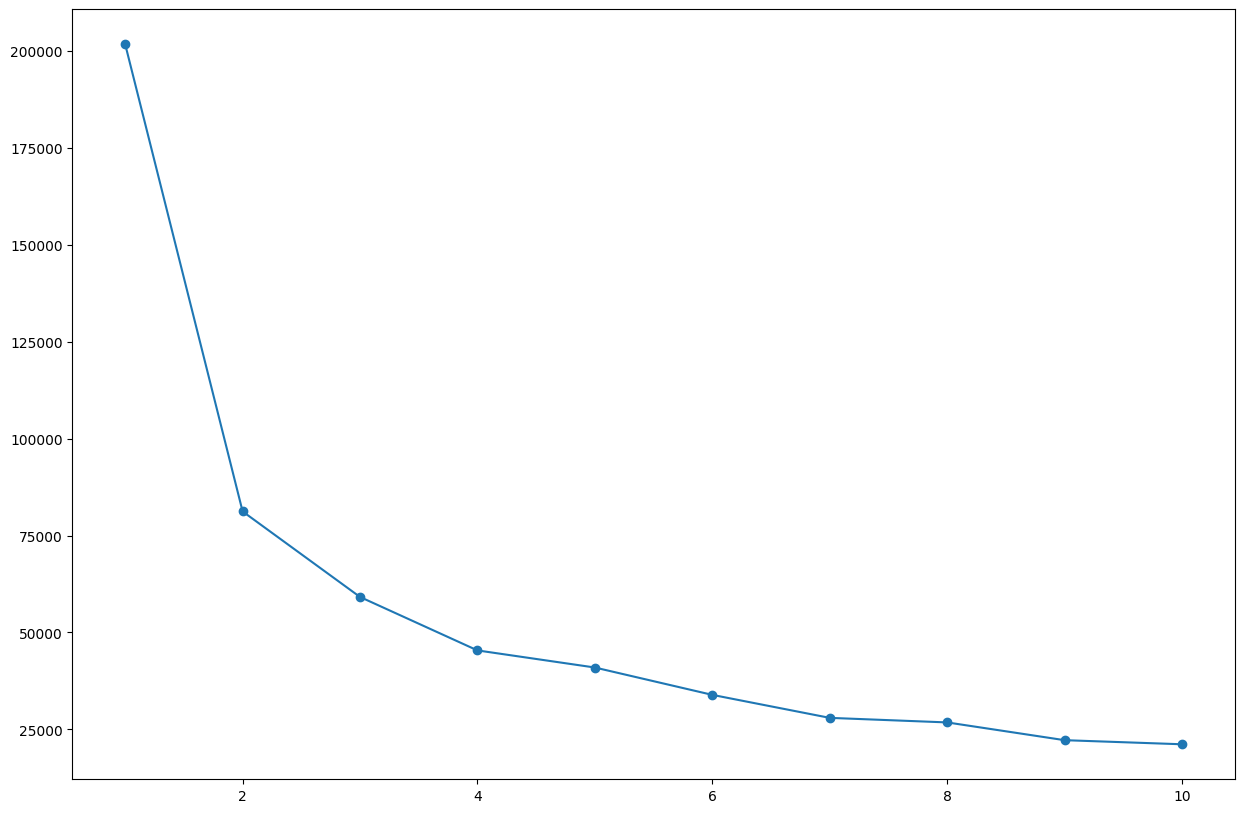

In [10]:
fig = plt.figure(figsize=(15, 10))

plt.plot(
    range(1, 11),
    wcss,
    marker='o',  
    linestyle='-'
)

plt.show()

### Train Unsupervised Model - KMeans

In [11]:
k = 6

kmeans_model = KMeans(
    n_clusters = k, 
    init = 'k-means++',
    random_state = 42
)

In [12]:
kmeans_model.fit(x_train)

KMeans(n_clusters=6, random_state=42)

In [13]:
print(len(kmeans_model.labels_), '=>', type(kmeans_model.labels_))
print(kmeans_model.predict(x_train), '=>', type(kmeans_model.predict(x_train)))

16512 => <class 'numpy.ndarray'>
[3 1 1 ... 3 0 5] => <class 'numpy.ndarray'>


In [14]:
y_train = kmeans_model.predict(x_train)

In [15]:
x_train['cluster'] = y_train
x_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


#### Plotting the results with x_train

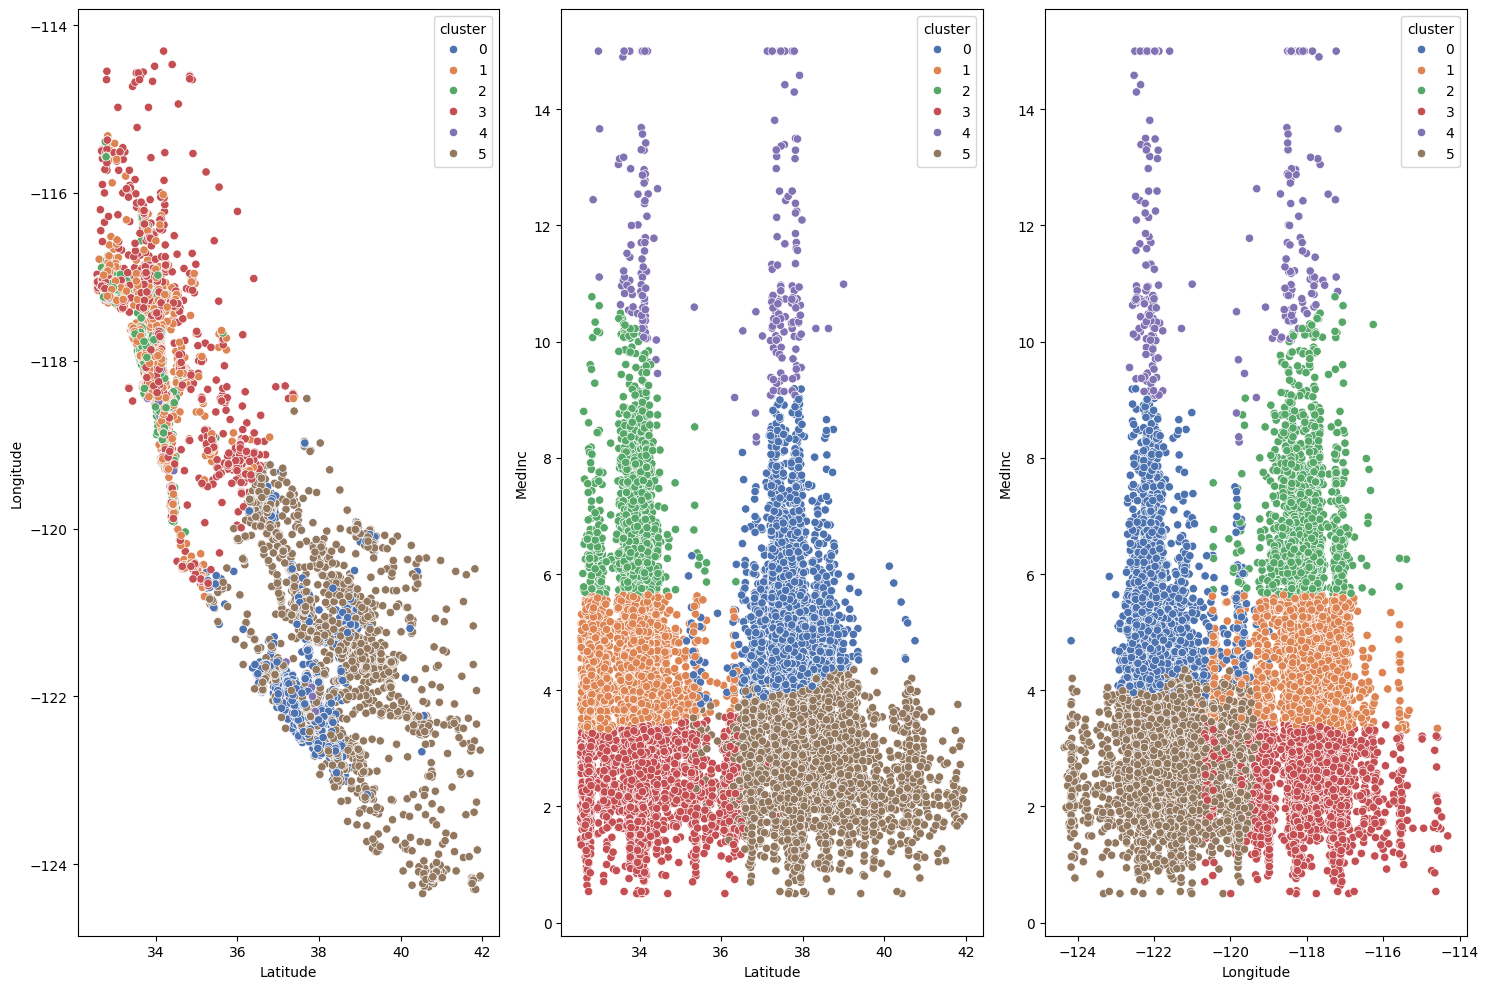

In [16]:
fig, axs = plt.subplots(
    1, 
    3, 
    figsize = (15, 10)
)

sns.scatterplot(
    ax = axs[0],
    data = x_train,
    x = 'Latitude',
    y = 'Longitude',
    hue = 'cluster',
    palette = 'deep'
)

sns.scatterplot(
    ax = axs[1],
    data = x_train,
    x = 'Latitude',
    y = 'MedInc',
    hue = 'cluster',
    palette = 'deep'
)

sns.scatterplot(
    ax = axs[2],
    data = x_train,
    x = 'Longitude',
    y = 'MedInc',
    hue = 'cluster',
    palette = 'deep'
)

plt.tight_layout()
plt.show()

In [17]:
y_test = kmeans_model.predict(x_test)

In [18]:
x_test['cluster'] = y_test
x_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


#### Plotting results overlapping x_train and x_test

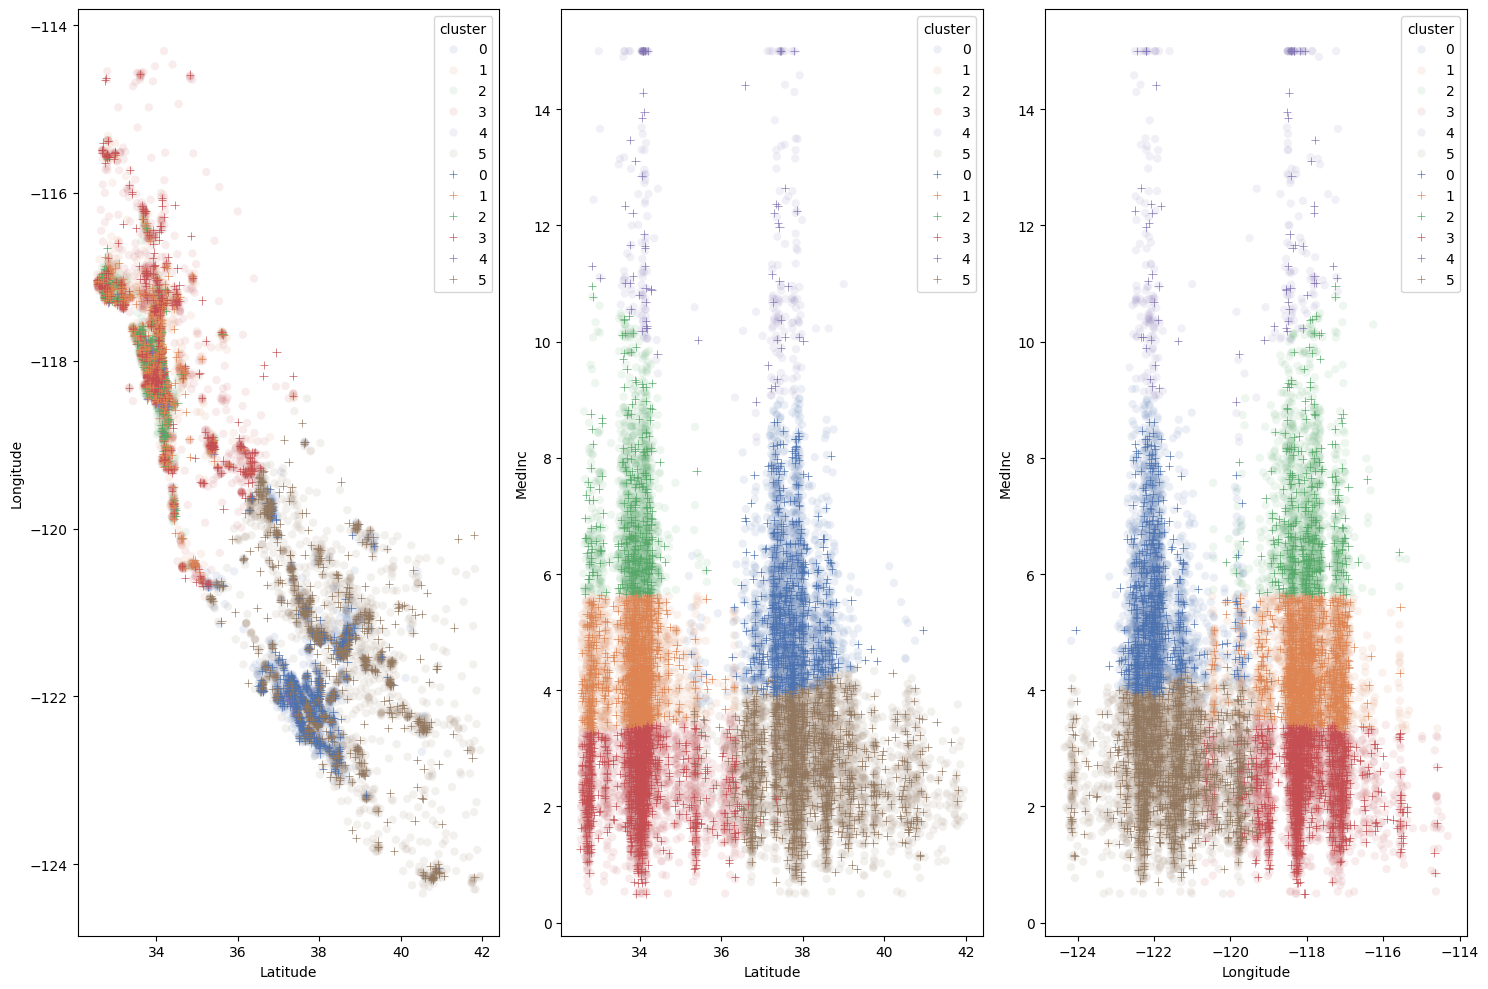

In [19]:
fig, axis = plt.subplots(1, 3, figsize = (15, 10))

sns.scatterplot(ax = axis[0], data = x_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = x_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = x_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = x_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = x_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = x_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

plt.show()

### Train Unsupervised Model - Hierarchical Cluster

Check results and training process

In [20]:
x_train_ch.head()

,Latitude,Longitude
14196,32.71,-117.03
8267,33.77,-118.16
17445,34.66,-120.48
14265,32.69,-117.11
2271,36.78,-119.80


In [21]:
x_test_ch.head()

,Latitude,Longitude
20046,36.06,-119.01
3024,35.14,-119.46
15663,37.80,-122.44
20484,34.28,-118.72
9814,36.62,-121.93


#### Dendogram

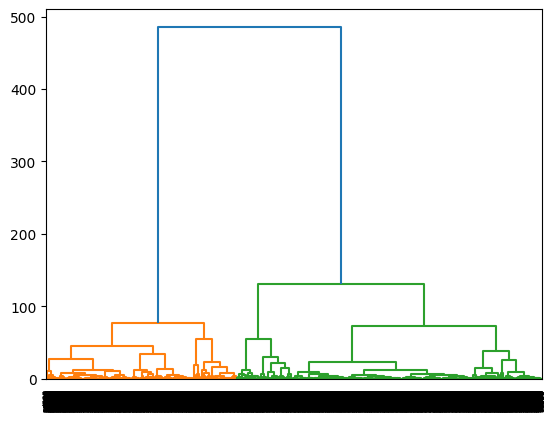

<Figure size 1500x1000 with 0 Axes>

In [22]:
dendrogram = sch.dendrogram(
    sch.linkage(
        x_train_ch,
        method = 'ward',
        #random_state = 42
    )
)

fig = plt.figure(figsize=(15, 10))

plt.show()


In [24]:
hcModel = AgglomerativeClustering(
    n_clusters = 4, 
    linkage = "ward"
)

y_train_hc = hcModel.fit_predict(x_train_ch)
y_test_hc = hcModel.fit_predict(x_test_ch)

In [25]:
x_train_ch['cluster'] = y_train_hc
x_test_ch['cluster'] = y_test_hc

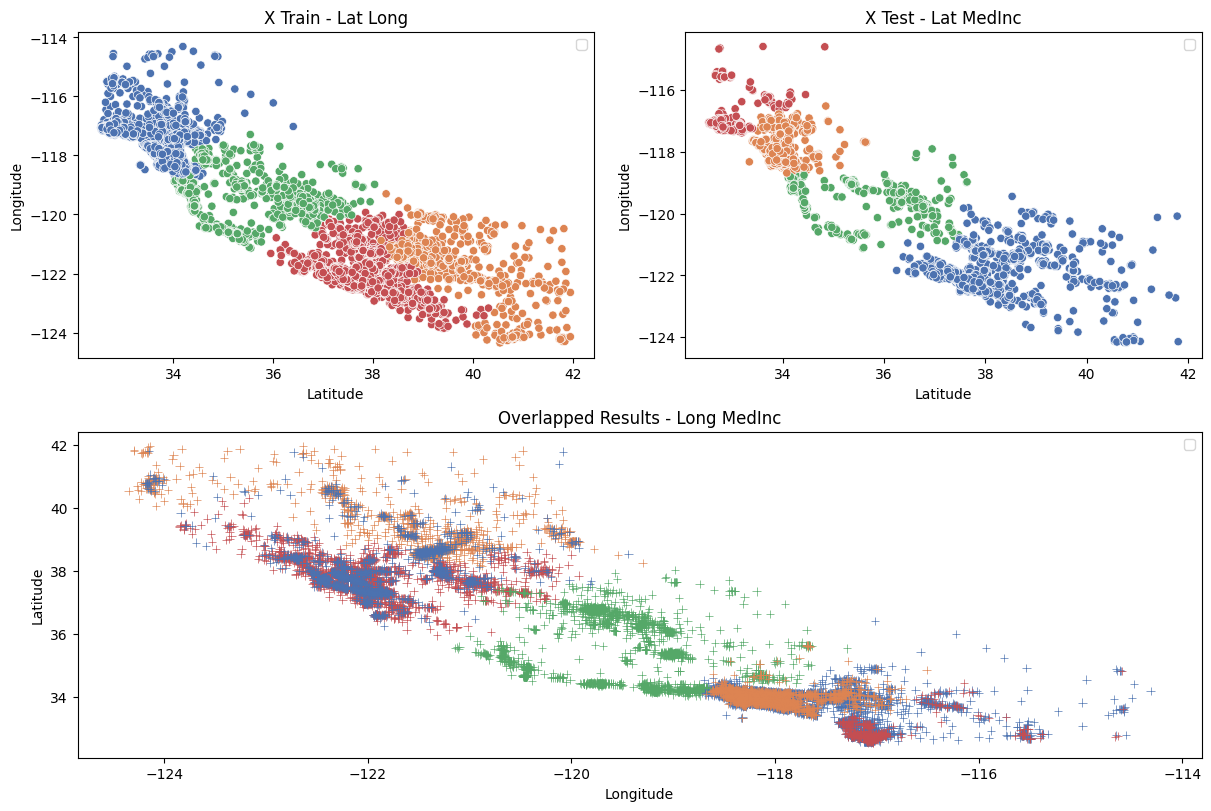

In [26]:
fig = plt.figure(
    constrained_layout=True,
    figsize = (
        12, 8
    )
)

gs = fig.add_gridspec(2, 2)

ax0_1 = fig.add_subplot(
    gs[0, 0]
)
ax0_2 = fig.add_subplot(
    gs[0, 1],
)
ax1 = fig.add_subplot(
    gs[1, :]
)

ax0_1.set_title('X Train - Lat Long')
ax0_2.set_title('X Test - Lat MedInc')
ax1.set_title('Overlapped Results - Long MedInc')

sns.scatterplot(
    ax = ax0_1,
    data = x_train_ch,
    x = 'Latitude',
    y = 'Longitude',
    hue = 'cluster',
    palette = "deep"
).legend([])
sns.scatterplot(
    ax = ax0_2,
    data = x_test_ch,
    x = 'Latitude',
    y = 'Longitude',
    hue = 'cluster',
    palette = "deep"
).legend([])

sns.scatterplot(
    ax = ax1,
    data = x_train_ch,
    x = 'Longitude',
    y = 'Latitude',
    hue = 'cluster',
    palette = "deep", 
    marker = "+"
).legend([])
sns.scatterplot(
    ax = ax1,
    data = x_test_ch,
    x = 'Longitude',
    y = 'Latitude',
    hue = 'cluster',
    palette = "deep", 
    marker = "+"
).legend([])

plt.show()

### Train Supervised Model - Prevent Overfitting
#### DecisionTreeClassifier()

In [27]:
accuracy_metric = {}

for depth in range(1, 12):
    tModel = DecisionTreeClassifier(max_depth = depth, random_state=42)
    tModel.fit(x_train, y_train)
    pred = tModel.predict(x_test)
    accuracy_metric[depth] = accuracy_score(y_test, pred)

accuracy_metric

{1: 0.5385174418604651,
 2: 0.7732558139534884,
 3: 0.9113372093023255,
 4: 0.9837693798449613,
 5: 0.9987887596899225,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0}

### Optimize Model
#### DecisionTreeClassifier()

In [28]:
tModel_opt = DecisionTreeClassifier(max_depth = 4, random_state = 42)
tModel_opt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

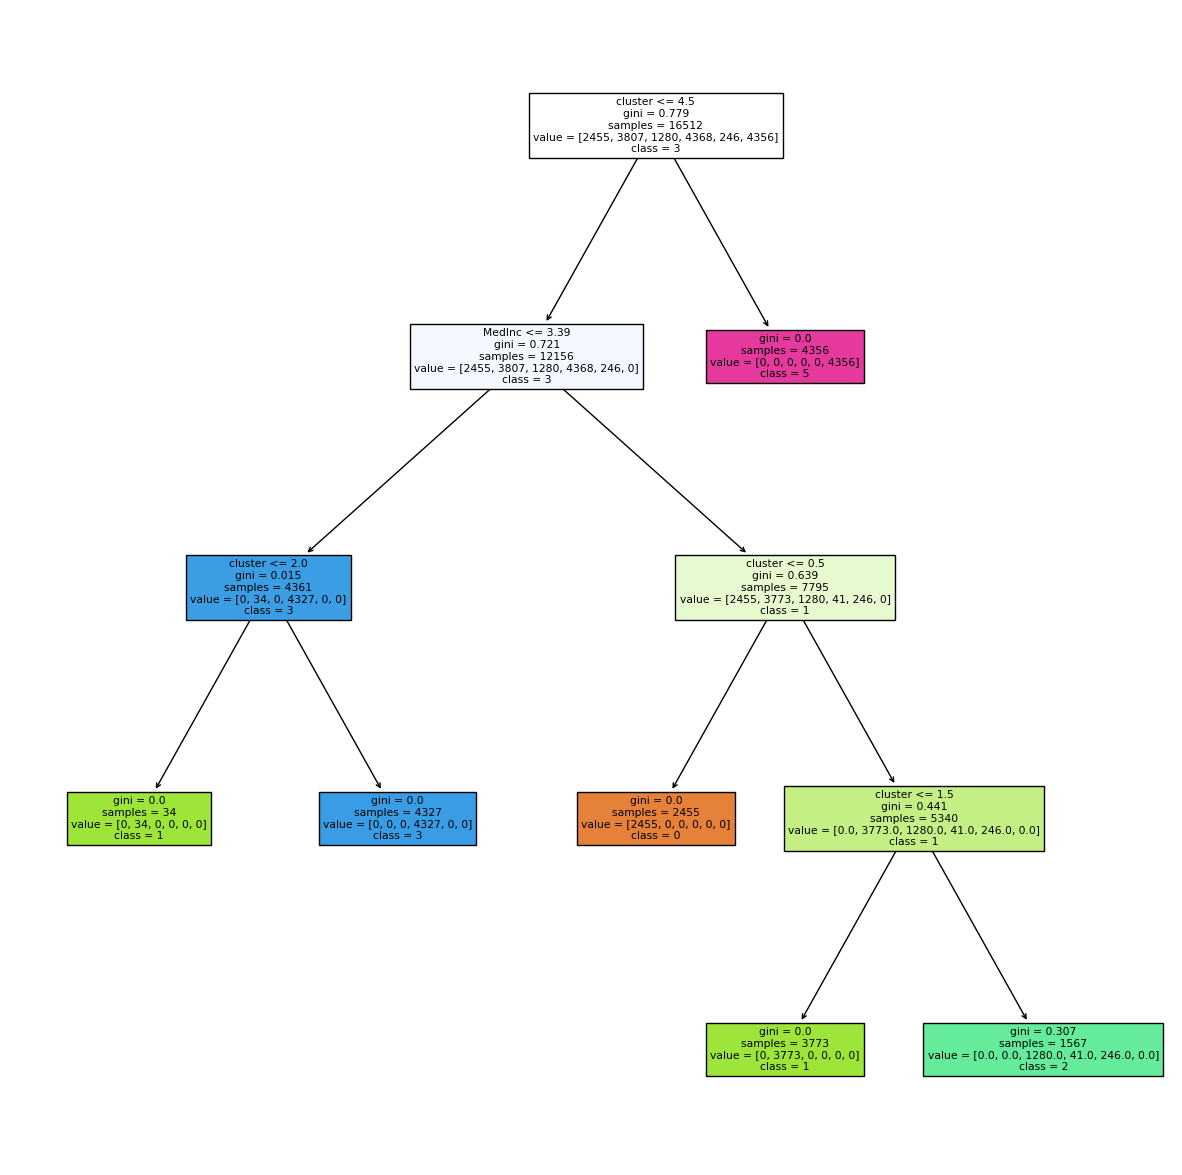

In [29]:
fig = plt.figure(
    figsize = (15, 15)
)

tree.plot_tree(
    tModel_opt,
    feature_names = x_train.columns,
    class_names = ["0", "1", "2", "3", "4", "5"], 
    filled = True
)

plt.show()

In [30]:
predictions = {
    'x_test': [tModel_opt.predict(x_test), accuracy_score(y_test, tModel_opt.predict(x_test))], 
    'x_train': [tModel_opt.predict(x_train), accuracy_score(y_train, tModel_opt.predict(x_train))]
}
predictions

{'x_test': [array([3, 3, 5, ..., 2, 5, 1]), 0.9837693798449613],
 'x_train': [array([3, 1, 1, ..., 3, 0, 5]), 0.9826187015503876]}

### Save the Models

In [31]:
dump(kmeans_model, open('../models/k-means_clusters-6_kmeans++_rand-state-42.sav', 'wb'))
dump(hcModel, open('../models/hierarchical-cluster_n-4_linkage-ward.sav', 'wb'))
dump(tModel_opt, open('../models/decission-tree_depth-4_rand-state-42.sav', 'wb'))